In [1]:
import pandas as pd
df = pd.read_csv('diabetic_data.csv')

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df = df.replace("?",np.nan)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
#Ratio of readmission
df['readmitted'].value_counts()/len(df)


NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [8]:
df = df.replace("?",np.nan)


In [9]:

# df.readmitted = df.readmitted.replace({"NO":0,"<30":1,">30":2})
# df.change = df.change.replace({"No":0,"Ch":1})


In [10]:
df.drop(columns=['weight','payer_code','medical_specialty'],inplace=True)

In [11]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
df.isnull().sum()

encounter_id                   0
patient_nbr                    0
race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [13]:
# There is only 3 entries for Unknown/Invalid, hence we drop that record
df = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

In [14]:
# When we look the graph, we can see too much values. Getting rid of that situation, we applied this rules:

# If any one includes "home" word I will grouping into one
# If not, it will be as OTHER
# NAN = 18, 25, 26

disposition_sid = df.discharge_disposition_id.apply(lambda x: 
                                             'Discharged to Home' if x in [1,6,8,13] 
                                             else 'Expired' if x in [7,11,18,19,20,21,26,25,10]
                                             else 'Other')

df.insert(47, "disposition_sid_source_id_numeric", disposition_sid)



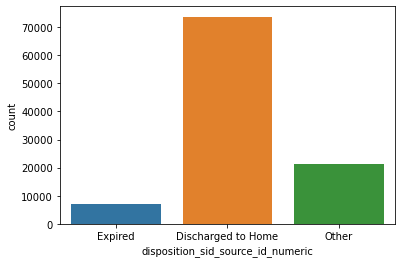

In [15]:
import seaborn as sns
ax = sns.countplot(x="disposition_sid_source_id_numeric", data=df)

In [16]:
df.disposition_sid_source_id_numeric.value_counts()

Discharged to Home    73641
Other                 21161
Expired                6961
Name: disposition_sid_source_id_numeric, dtype: int64

In [17]:
# We can see that there is same problem here. Again we applied some map like:

# we'll put the similar ones together like Referral or Transfer
# we will replace Null, Not Mapped, Unknown values as NAN

admission_sid = df.admission_source_id.apply(lambda x: 
                                             'Referral' if x in [1,2,3] 
#                                              else(np.nan) if x in [4,5,6,8,9,10,11,13,14,22,25] 
                                             else 'Emergency' if x in [7,12,14] 
                                             else 'Transfer' if x in [4,5,6,18,22,25,26]
                                             else 'Other')

df.insert(47, "admission_source_id_numeric", admission_sid)


In [18]:
df.admission_source_id.value_counts()


7     57492
1     29564
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

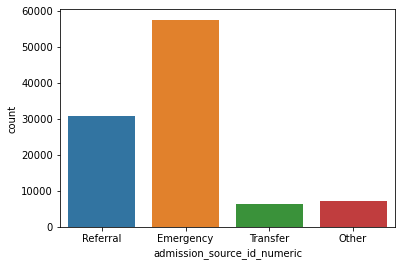

In [19]:
ax = sns.countplot(x="admission_source_id_numeric", data=df)

In [20]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source_id_numeric,disposition_sid_source_id_numeric
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,NO,Referral,Expired
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to Home
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to Home
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to Home
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,No,No,No,No,Ch,Yes,>30,Emergency,Other
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,No,No,No,No,No,Yes,NO,Transfer,Other
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to Home
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,No,No,No,Ch,Yes,NO,Emergency,Other


In [21]:
#https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD9-CM/2011/
admission_sid=df.diag_1.apply(lambda x: "Other" if str(x).startswith("V") or str(x).startswith("E") 
                     else "Circulatory" if 390<=float(x)<=459 or float(x)==785
                                             else "Respiratory" if 460<=float(x)<=519 or float(x)==786
                                             else "Digestive" if 520<=float(x)<=579 or float(x)==787
                                             else "Diabetes" if 250<=float(x)<251 or 800<=float(x)<=999
                                             else "Muscoloskeletal" if 460<=float(x)<=519
                                             else "Genitourinary" if 580<=float(x)<=629 or float(x)==788
                                             else "Neoplasms" if 140<=float(x)<=239
                                             else 'Other')

df.insert(47, "diag_1_categorical", admission_sid)

admission_sid=df.diag_2.apply(lambda x: "Other" if str(x).startswith("V") or str(x).startswith("E") 
                     else "Circulatory" if 390<=float(x)<=459 or float(x)==785
                                             else "Respiratory" if 460<=float(x)<=519 or float(x)==786
                                             else "Digestive" if 520<=float(x)<=579 or float(x)==787
                                             else "Diabetes" if 250<=float(x)<251 or 800<=float(x)<=999
                                             else "Muscoloskeletal" if 460<=float(x)<=519
                                             else "Genitourinary" if 580<=float(x)<=629 or float(x)==788
                                             else "Neoplasms" if 140<=float(x)<=239
                                             else 'Other')

df.insert(47, "diag_2_categorical", admission_sid)


admission_sid=df.diag_3.apply(lambda x: "Other" if str(x).startswith("V") or str(x).startswith("E") 
                     else "Circulatory" if 390<=float(x)<=459 or float(x)==785
                                             else "Respiratory" if 460<=float(x)<=519 or float(x)==786
                                             else "Digestive" if 520<=float(x)<=579 or float(x)==787
                                             else "Diabetes" if 250<=float(x)<251 or 800<=float(x)<=999
                                             else "Muscoloskeletal" if 460<=float(x)<=519
                                             else "Genitourinary" if 580<=float(x)<=629 or float(x)==788
                                             else "Neoplasms" if 140<=float(x)<=239
                                             else 'Other')

df.insert(47, "diag_3_categorical", admission_sid)

In [22]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_3_categorical,diag_2_categorical,diag_1_categorical,admission_source_id_numeric,disposition_sid_source_id_numeric
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,NO,Other,Other,Diabetes,Referral,Expired
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Ch,Yes,>30,Other,Diabetes,Other,Emergency,Discharged to Home
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,Yes,NO,Other,Diabetes,Other,Emergency,Discharged to Home
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Ch,Yes,NO,Circulatory,Diabetes,Other,Emergency,Discharged to Home
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Ch,Yes,NO,Diabetes,Neoplasms,Neoplasms,Emergency,Discharged to Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,No,Ch,Yes,>30,Circulatory,Other,Diabetes,Emergency,Other
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,No,No,Yes,NO,Digestive,Other,Digestive,Transfer,Other
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,Ch,Yes,NO,Other,Genitourinary,Other,Emergency,Discharged to Home
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,Ch,Yes,NO,Diabetes,Other,Diabetes,Emergency,Other


In [23]:
# drugs taken columns are left to pre-process

# pd.set_option('display.max_columns', 100)


In [24]:
# pd.wide_to_long(df, stubnames='ht', i=['famid', 'birth'], j='age')

In [25]:
# df.age = df.age.replace({"[70-80)":75,
#                          "[60-70)":65,
#                          "[50-60)":55,
#                          "[80-90)":85,
#                          "[40-50)":45,
#                          "[30-40)":35,
#                          "[90-100)":95,
#                          "[20-30)":25,
#                          "[10-20)":15,
#                          "[0-10)":5})

In [37]:
df.to_excel("Dataset.xlsx",index=False)
